In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [75]:
data_url = 'nbastats.csv'
df = pd.read_csv(data_url)
df = df.drop(columns = ['Arena', 'Attend.'])
df['W%'] = (df['W'] / df['G'])
print(df)

    Season                     Team Championship   Age     W     L    PW  \
0    23-24          Boston Celtics*          NaN  28.2  64.0  18.0  66.0   
1    23-24          Denver Nuggets*          NaN  27.1  57.0  25.0  54.0   
2    23-24   Oklahoma City Thunder*          NaN  23.4  57.0  25.0  58.0   
3    23-24  Minnesota Timberwolves*          NaN  27.2  56.0  26.0  57.0   
4    23-24    Los Angeles Clippers*          NaN  30.4  51.0  31.0  49.0   
..     ...                      ...          ...   ...   ...   ...   ...   
854  96-97       Philadelphia 76ers           NC  25.5  22.0  60.0  24.0   
855  96-97           Denver Nuggets           NC  28.6  21.0  61.0  24.0   
856  96-97        San Antonio Spurs           NC  29.9  20.0  62.0  19.0   
857  96-97           Boston Celtics           NC  26.1  15.0  67.0  22.0   
858  96-97      Vancouver Grizzlies           NC  25.0  14.0  68.0  15.0   

       PL    MOV   SOS  ...   ORB   DRB   TRB   AST  STL  BLK   TOV    PF  \
0    16.0 

In [76]:
df.head()

,Season,Team,Championship,Age,W,L,PW,PL,MOV,SOS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W %
0,23-24,Boston Celtics*,NaN,28.2,64.0,18.0,66.0,16.0,11.34,-0.60,...,10.7,35.6,46.3,26.9,6.8,6.6,11.9,16.2,120.6,0.780488
1,23-24,Denver Nuggets*,NaN,27.1,57.0,25.0,54.0,28.0,5.26,-0.03,...,10.7,33.7,44.4,29.5,7.1,5.6,12.6,18.2,114.9,0.695122
2,23-24,Oklahoma City Thunder*,NaN,23.4,57.0,25.0,58.0,24.0,7.41,-0.05,...,8.8,33.2,42.0,27.1,8.5,6.6,12.7,18.8,120.1,0.695122
3,23-24,Minnesota Timberwolves*,NaN,27.2,56.0,26.0,57.0,25.0,6.45,-0.07,...,9.4,34.2,43.6,26.6,7.9,6.1,14.2,18.8,113.0,0.682927
4,23-24,Los Angeles Clippers*,NaN,30.4,51.0,31.0,49.0,33.0,3.28,0.13,...,10.0,32.9,43.0,25.6,7.8,5.0,13.1,18.5,115.6,0.621951


In [77]:
df.tail()

,Season,Team,Championship,Age,W,L,PW,PL,MOV,SOS,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W %
854,96-97,Philadelphia 76ers,NC,25.5,22.0,60.0,24.0,58.0,-6.54,0.65,...,15.5,28.7,44.2,20.7,8.3,4.8,17.5,21.1,100.2,0.268293
855,96-97,Denver Nuggets,NC,28.6,21.0,61.0,24.0,58.0,-6.28,-0.12,...,12.1,29.9,42.0,23.0,6.1,5.9,16.6,21.8,97.8,0.256098
856,96-97,San Antonio Spurs,NC,29.9,20.0,62.0,19.0,63.0,-7.88,-0.05,...,13.4,26.0,39.4,20.3,7.9,5.3,15.2,21.5,90.5,0.243902
857,96-97,Boston Celtics,NC,26.1,15.0,67.0,22.0,60.0,-7.33,0.71,...,13.4,26.7,40.0,21.9,9.9,3.8,16.4,23.4,100.6,0.182927
858,96-97,Vancouver Grizzlies,NC,25.0,14.0,68.0,15.0,67.0,-10.23,0.06,...,12.5,26.3,38.8,22.7,8.0,5.7,15.9,21.4,89.2,0.170732


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Season        832 non-null    object 
 1   Team          832 non-null    object 
 2   Championship  802 non-null    object 
 3   Age           832 non-null    float64
 4   W             832 non-null    float64
 5   L             832 non-null    float64
 6   PW            832 non-null    float64
 7   PL            832 non-null    float64
 8   MOV           832 non-null    float64
 9   SOS           832 non-null    float64
 10  SRS           832 non-null    float64
 11  ORtg          832 non-null    float64
 12  DRtg          832 non-null    float64
 13  NRtg          832 non-null    float64
 14  Pace          832 non-null    float64
 15  FTr           832 non-null    float64
 16  3PAr          832 non-null    float64
 17  TS%           832 non-null    float64
 18  eFG%          832 non-null    

In [79]:
df.describe()

,Age,W,L,PW,PL,MOV,SOS,SRS,ORtg,DRtg,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,W %
count,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,...,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000
mean,26.780168,39.766827,39.766827,39.871394,39.662260,-0.005637,-0.000817,-0.006550,107.289303,107.281851,...,11.192668,31.446154,42.636418,22.435817,7.667067,4.912500,14.518990,20.980288,101.404327,0.499819
std,1.812453,12.677465,12.609700,12.351805,12.301864,4.620189,0.392119,4.494698,4.669368,4.513597,...,1.478285,2.343033,2.088426,2.371053,0.886683,0.817093,1.215286,1.811707,7.728598,0.152438
min,22.100000,7.000000,9.000000,7.000000,11.000000,-13.910000,-0.990000,-13.960000,92.200000,94.100000,...,7.600000,24.900000,35.800000,15.600000,5.500000,2.400000,11.100000,15.600000,81.900000,0.106061
25%,25.500000,30.750000,30.000000,31.000000,30.000000,-3.082500,-0.290000,-3.070000,104.100000,104.000000,...,10.200000,29.700000,41.200000,20.800000,7.100000,4.300000,13.700000,19.700000,95.675000,0.390244
50%,26.600000,41.000000,39.000000,40.000000,39.000000,0.275000,0.000000,0.225000,106.800000,107.100000,...,11.100000,31.250000,42.600000,22.100000,7.600000,4.900000,14.500000,20.900000,99.900000,0.512195
75%,28.000000,49.000000,49.000000,49.000000,49.000000,3.300000,0.292500,3.132500,110.525000,110.400000,...,12.125000,33.100000,44.025000,23.900000,8.200000,5.400000,15.200000,22.200000,106.600000,0.609756
max,32.000000,73.000000,72.000000,68.000000,70.000000,11.630000,0.960000,11.350000,123.200000,120.400000,...,17.200000,42.200000,51.700000,30.800000,12.000000,8.200000,19.000000,27.100000,123.300000,0.890244


In [80]:
data = pd.read_csv('nbastats.csv', usecols=['Championship'])
data.info

<bound method DataFrame.info of     Championship
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
..           ...
854           NC
855           NC
856           NC
857           NC
858           NC

[859 rows x 1 columns]>

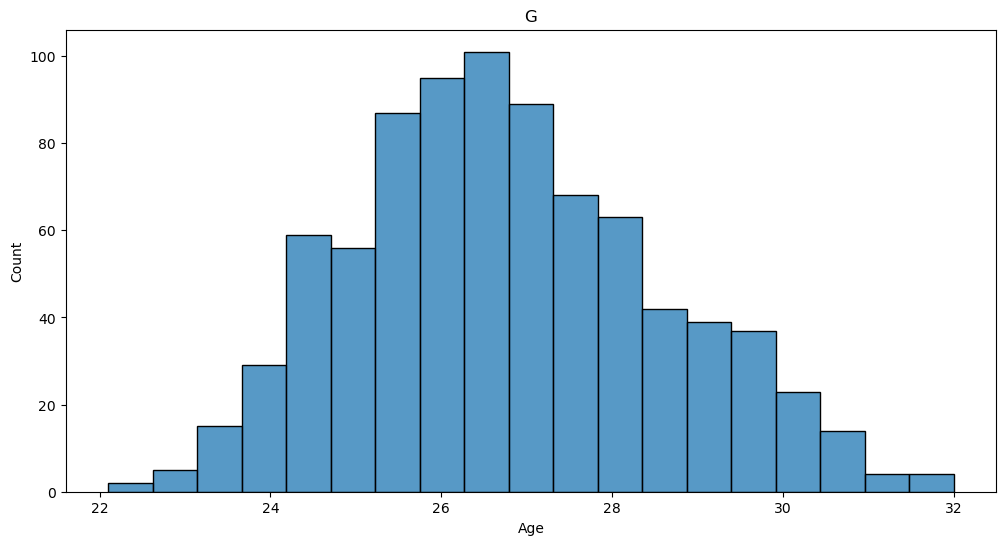

In [81]:
plt.figure(figsize=(12, 6)) # setting the weidth and the height of the figure
sns.histplot(data=df, x='Age') # creating a histogram of the age column from the dataset
plt.title('G')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [82]:
# Look for relationships between features using correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '23-24'

<Axes: xlabel='PTS', ylabel='Count'>

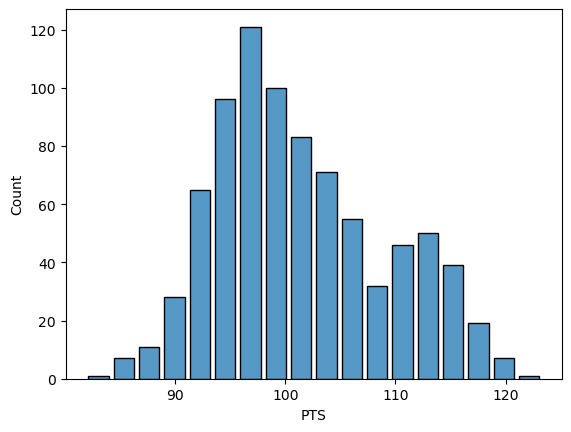

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data_url = 'nbastats.csv'
df = pd.read_csv(data_url)

sns.histplot(x='PTS', data=df, shrink=0.8)

In [84]:
champ = df[df['Championship'] == 'C'] 
print(champ)

    Season                    Team Championship   Age     W     L    PW    PL  \
34   22-23         Denver Nuggets*            C  26.6  53.0  29.0  49.0  33.0   
64   21-22  Golden State Warriors*            C  27.6  53.0  29.0  55.0  27.0   
99   20-21        Milwaukee Bucks*            C  28.1  46.0  26.0  48.0  24.0   
126  19-20     Los Angeles Lakers*            C  29.5  52.0  19.0  48.0  23.0   
156  18-19        Toronto Raptors*            C  27.3  58.0  24.0  56.0  26.0   
188  17-18  Golden State Warriors*            C  28.8  58.0  24.0  56.0  26.0   
217  16-17  Golden State Warriors*            C  28.2  67.0  15.0  67.0  15.0   
250  15-16    Cleveland Cavaliers*            C  28.1  57.0  25.0  57.0  25.0   
279  14-15  Golden State Warriors*            C  26.6  67.0  15.0  65.0  17.0   
310  13-14      San Antonio Spurs*            C  28.9  62.0  20.0  61.0  21.0   
341  12-13             Miami Heat*            C  30.3  66.0  16.0  62.0  20.0   
375  11-12             Miami

In [96]:
S23 = df[df['Season'] == '22-23']
S22 = df[df['Season'] == '21-22']
S21 = df[df['Season'] == '20-21']
S20 = df[df['Season'] == '19-20']
S19 = df[df['Season'] == '18-19']
S18 = df[df['Season'] == '17-18']
S17 = df[df['Season'] == '16-17']
S16 = df[df['Season'] == '15-16']
S15 = df[df['Season'] == '14-15']
S14 = df[df['Season'] == '13-14']
S13 = df[df['Season'] == '12-13']
S12 = df[df['Season'] == '11-12']
S11 = df[df['Season'] == '10-11']
S10 = df[df['Season'] == '09-10']
S09 = df[df['Season'] == '08-09']
S08 = df[df['Season'] == '07-08']
S07 = df[df['Season'] == '06-07']
S06 = df[df['Season'] == '06-07']
S05 = df[df['Season'] == '05-06']
S04 = df[df['Season'] == '04-05']
S03 = df[df['Season'] == '03-04']
S02 = df[df['Season'] == '02-03']
S01 = df[df['Season'] == '01-02']
S00 = df[df['Season'] == '00-01']
S99 = df[df['Season'] == '99-00']
S98 = df[df['Season'] == '98-99']
S97 = df[df['Season'] == '97-98']
S96 = df[df['Season'] == '96-97']
print(S23)

   Season                     Team Championship   Age     W     L    PW    PL  \
31  22-23         Milwaukee Bucks*           NC  29.8  58.0  24.0  50.0  32.0   
32  22-23          Boston Celtics*           NC  27.4  57.0  25.0  57.0  25.0   
33  22-23      Philadelphia 76ers*           NC  28.2  54.0  28.0  52.0  30.0   
34  22-23          Denver Nuggets*            C  26.6  53.0  29.0  49.0  33.0   
35  22-23     Cleveland Cavaliers*           NC  25.4  51.0  31.0  55.0  27.0   
36  22-23       Memphis Grizzlies*           NC  24.4  51.0  31.0  51.0  31.0   
37  22-23        Sacramento Kings*           NC  25.4  48.0  34.0  47.0  35.0   
38  22-23         New York Knicks*           NC  24.5  47.0  35.0  48.0  34.0   
39  22-23           Brooklyn Nets*           NC  28.0  45.0  37.0  43.0  39.0   
40  22-23            Phoenix Suns*           NC  28.1  45.0  37.0  46.0  36.0   
41  22-23   Golden State Warriors*           NC  27.3  44.0  38.0  45.0  37.0   
42  22-23    Los Angeles Cli

<Axes: xlabel='PTS', ylabel='Season'>

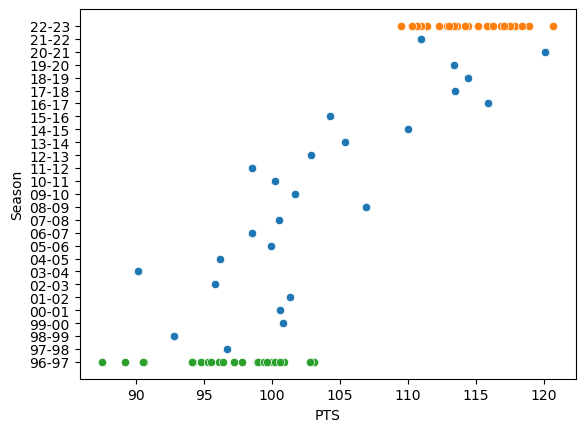

In [100]:
sns.scatterplot(champ, x='PTS', y='Season')
sns.scatterplot(S23, x='PTS', y='Season')
sns.scatterplot(S96, x='PTS', y='Season')

In [98]:
sns.histplot(S23, x='W%', y='Season')

ValueError: Could not interpret value `W%` for parameter `x`